Example usage for pyJHTDB.

In [1]:
%matplotlib inline
import numpy as np
import pyJHTDB

/stuff/ext_installs/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


I'm going to create a 2D grid of points, and then get the values of the velocity at those points.
Note that the points must be in single precision if they are to be used for any getData call.

In [2]:
t = np.linspace(0, 1, 64)
x = np.zeros((t.shape[0], t.shape[0], 3), np.float32)
x[:, :, 0] = t[np.newaxis, :]
x[:, :, 1] = t[:, np.newaxis]
x[:, :, 2] = .0

Since the dataset I'm gonna use is the isotropic turbulence dataset, it doesn't really matter what value I choose for the z coordinates, if it's fixed.
Not for this simple example anyway.

The next step is to generate a libJHTDB object, connect it to the database, and use it to read the data that we need.
I'm using 4th order Lagrange interpolation (that's the `sinterp = 4` line), and for now we need to specify the actual number corresponding to that (you can find all the different codes in turblib.h from the C package).

In [3]:
lJHTDB = pyJHTDB.libJHTDB()
lJHTDB.initialize()

import pyJHTDB.dbinfo
T = pyJHTDB.dbinfo.isotropic1024coarse['time'][-1]
time = np.random.random()*T
u = lJHTDB.getData(
               time,
               x,
               sinterp = 4,
               getFunction='getVelocity')
ubox = lJHTDB.getBoxFilter(
               time,
               x,
               field = 'velocity',
               filter_width = 5*(2*np.pi / 1024))
lJHTDB.finalize()

Now we have the velocity stored in u, and we're gonna compute the energy and make a nice plot of it.

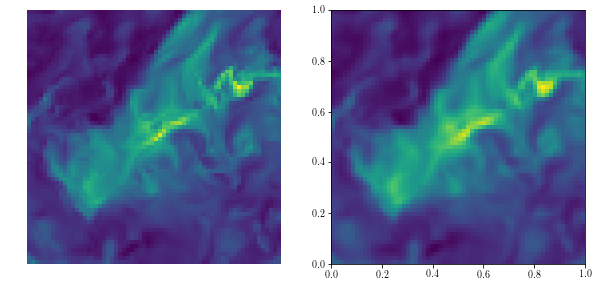

In [4]:
e = np.sum(u**2, axis = 2)
ebox = np.sum(ubox**2, axis = 2)

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
a = fig.add_subplot(121)
a.set_axis_off()
a.imshow(e,
         extent = [t[0], t[-1] - t[0], t[0], t[-1] - t[0]],
         interpolation = 'none')
a = fig.add_subplot(122)
a.imshow(ebox,
         extent = [t[0], t[-1] - t[0], t[0], t[-1] - t[0]],
         interpolation = 'none')

Next, get some trajectories.

In [6]:
lJHTDB.initialize()

x, t = lJHTDB.getPosition(
    starttime = 0.1,
    endtime = 0.2,
    dt = 0.001,
    point_coords = 2*np.pi * np.random.random((20, 3)),
    steps_to_keep = 50)

lJHTDB.finalize()

starting integration loop, dataset is  isotropic1024coarse
at time step 1 out of 50
got next position for time step 1
at time step 2 out of 50
got next position for time step 2
at time step 3 out of 50
got next position for time step 3
at time step 4 out of 50
got next position for time step 4
at time step 5 out of 50
got next position for time step 5
at time step 6 out of 50
got next position for time step 6
at time step 7 out of 50
got next position for time step 7
at time step 8 out of 50
got next position for time step 8
at time step 9 out of 50
got next position for time step 9
at time step 10 out of 50
got next position for time step 10
at time step 11 out of 50
got next position for time step 11
at time step 12 out of 50
got next position for time step 12
at time step 13 out of 50
got next position for time step 13
at time step 14 out of 50
got next position for time step 14
at time step 15 out of 50
got next position for time step 15
at time step 16 out of 50
got next position 

Now, plot trajectories. Not spectactular because they're not that long, but this is the way a simple plot would work for long trajectories as well.

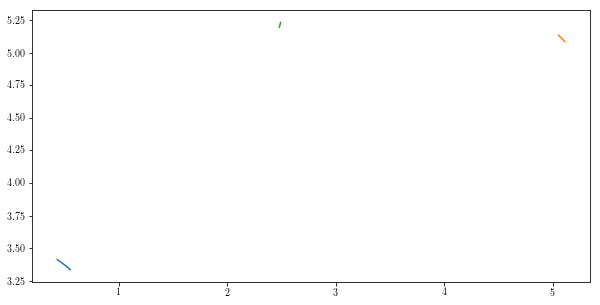

In [7]:
fig = plt.figure(figsize = (10, 5))
a = fig.add_subplot(111)
a.plot(x[:, 0], x[:, 1])